# Atividade - análise de complexidade temporal

## Orientações:

* Apenas as funções `range()`, `len()` e `int()`, e o método `.append()`, podem ser usadas nas implementações;
* Demais funções e bibliotecas do Python estão proibidas;
* Execute as células com os casos de teste propostos para cada uma das funções desenvolvidas.

In [ ]:
import random
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np # esta biblioteca será usada somente nos testes
from scipy.optimize import curve_fit # esta biblioteca será usada somente nos testes

# Algoritmo de detecção de colisões em retângulos

Descrição: dada uma lista de retângulos `ret = [ret1, ret2, ..., retN]` determinar os pares de retângulos que colidem entre si.

Implemente o algoritmo e determine sua complexidade temporal $O(\bullet)$.

Verifique se a complexidade temporal está coerente usando o método de análise de gráficos.

Vide exemplo abaixo, onde os retângulos 1 e 3 colidem entre si.

```python
>>> rets = [[1, 1, 2, 3],
            [3, 5, 1, 1],
            [2, 2, 2, 1]]
>>> lista_colisoes = colisoes(rets)
>>> print(lista_colisoes)
[[1, 3]]
```

In [ ]:
def plot_ret(ret, label):
  x, y, w, h = ret
  plt.plot([x, x + w, x + w, x, x], [y, y, y + h, y + h, y], label=label)

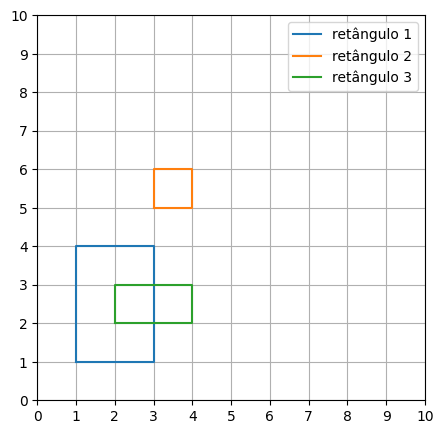

In [ ]:
ret1 = [1, 1, 2, 3]
ret2 = [3, 5, 1, 1]
ret3 = [2, 2, 2, 1]

plt.figure(figsize=(5, 5))
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.xticks(range(11))
plt.yticks(range(11))
plot_ret(ret1, label='retângulo 1')
plot_ret(ret2, label='retângulo 2')
plot_ret(ret3, label='retângulo 3')
plt.legend()
plt.grid();

In [ ]:
def colisoes(rets):
  lista_colisoes = []
  map_projeções = {}
  for r in range(len(rets)):
    ret = rets[r]
    map_projeções[r] = {}
    map_projeções[r] = {
        'x': [ret[0], ret[0] + ret[2]],
        'y': [ret[1], ret[1] + ret[3]]
    }
  for i in range(len(rets)):
    reta_A = map_projeções[i]
    for j in range(i + 1, len(rets)):
      reta_B = map_projeções[j]
      if interseccao_reta(reta_A['x'], reta_B['x']) and interseccao_reta(reta_A['y'], reta_B['y']):
        lista_colisoes.append([i, j])
  #print(lista_colisoes)
  return lista_colisoes

def maior_reta(a,b):
  return a if a[1] > b[1] else b

def interseccao_reta(a,b):
  maior = maior_reta(a,b)
  menor = b if maior == a else a
  return maior[1] > menor[0] and maior[0] < menor[1]

rets = [[1, 1, 2, 3],
        [3, 5, 1, 1],
        [2, 2, 2, 1]]
print(colisoes(rets))

[[0, 2]]


In [ ]:
x_min = 0
x_max = 500
y_min = 0
y_max = 500
h_max = 500
w_max = 500
n_rets = list(range(20, 501, 40))
random.seed(0)
tempos = []
for n in n_rets:
  rets = [(random.randint(x_min, x_max),
           random.randint(y_min, y_max),
           random.randint(0, w_max),
           random.randint(0, h_max)) for _ in range(n)]

  t = datetime.now()
  lista_colisoes = colisoes(rets)
  dt = datetime.now() - t
  tempos.append(dt.total_seconds())

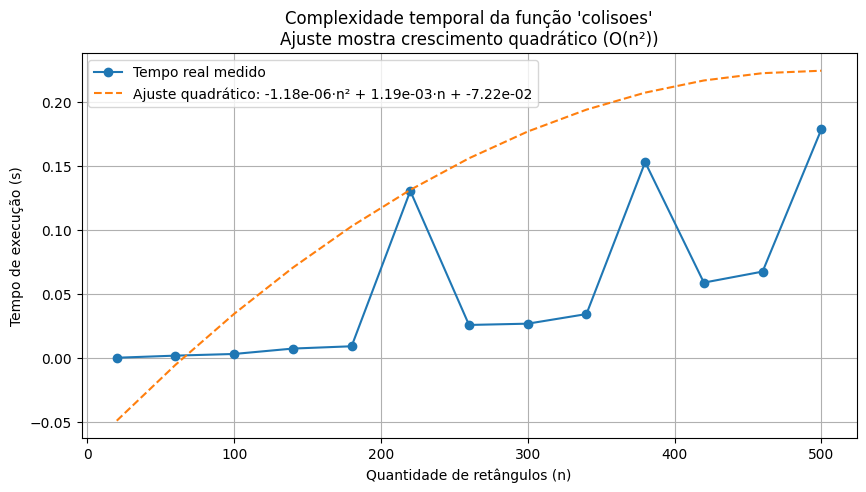

In [ ]:
#Grafico
def func_complexidade1(x, a, b):
  return a*x + b
plt.figure(figsize=(10, 5))
plt.title("Complexidade temporal da função 'colisoes'\nAjuste mostra crescimento quadrático (O(n²))")
plt.xlabel('Quantidade de retângulos (n)')
plt.ylabel('Tempo de execução (s)')
plt.plot(n_rets, tempos, label="Tempo real medido", marker='o')
a, b, c = popt
label_ajuste = f"Ajuste quadrático: {a:.2e}·n² + {b:.2e}·n + {c:.2e}"
plt.plot(n_rets, func_complexidade(np.array(n_rets), *popt), label=label_ajuste, linestyle='--')

plt.legend()
plt.grid()
plt.show()